<a href="https://colab.research.google.com/github/ashwinvaswani/Music-from-EEG/blob/master/code/notebooks/Music_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U mne


     |████████████████████████████████| 6.4MB 5.4MB/s 


In [0]:
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P01-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P04-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P05-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P06-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P07-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P09-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P11-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P12-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P13-raw.fif
!wget http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P14-raw.fif

--2020-01-23 18:54:38--  http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P01-raw.fif
Resolving www.ling.uni-potsdam.de (www.ling.uni-potsdam.de)... 141.89.97.24
Connecting to www.ling.uni-potsdam.de (www.ling.uni-potsdam.de)|141.89.97.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 683990507 (652M)
Saving to: ‘P01-raw.fif’

P01-raw.fif         100%[===================>] 652.30M  53.0MB/s    in 13s     

2020-01-23 18:54:50 (52.1 MB/s) - ‘P01-raw.fif’ saved [683990507/683990507]

--2020-01-23 18:54:52--  http://www.ling.uni-potsdam.de/mlcog/OpenMIIR-RawEEG_v1/P04-raw.fif
Resolving www.ling.uni-potsdam.de (www.ling.uni-potsdam.de)... 141.89.97.24
Connecting to www.ling.uni-potsdam.de (www.ling.uni-potsdam.de)|141.89.97.24|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 684505792 (653M)
Saving to: ‘P04-raw.fif’

P04-raw.fif         100%[===================>] 652.79M  8.94MB/s    in 39s     

2020-01-23 18:55:31 (16.8 MB/s) - ‘P0

In [0]:
ls

P01-raw.fif  P05-raw.fif  P07-raw.fif  P11-raw.fif  P13-raw.fif  sample_data/
P04-raw.fif  P06-raw.fif  P09-raw.fif  P12-raw.fif  P14-raw.fif


In [0]:
import mne
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fname = "P01-raw.fif"
raw = mne.io.read_raw_fif(fname)

Opening raw data file P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.


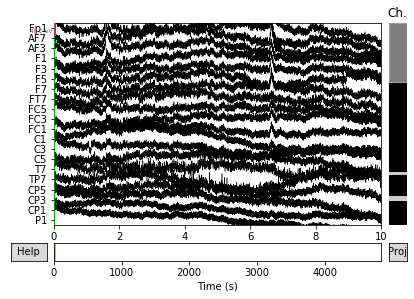

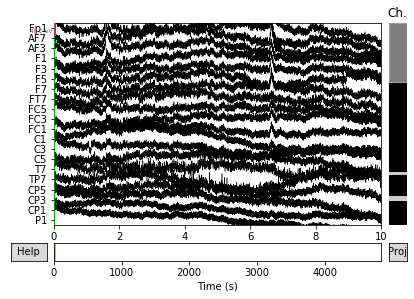

In [0]:
raw.plot()

In [0]:
print(raw)

<Raw  |  P01-raw.fif, n_channels x n_times : 69 x 2478166 (4840.2 sec), ~139 kB, data not loaded>


In [0]:
raw.crop(tmax=60).load_data()

Reading 0 ... 30720  =      0.000 ...    60.000 secs...


<Raw  |  P01-raw.fif, n_channels x n_times : 69 x 30721 (60.0 sec), ~16.3 MB, data loaded>

In [0]:
print(raw)

<Raw  |  P01-raw.fif, n_channels x n_times : 69 x 30721 (60.0 sec), ~16.3 MB, data loaded>


In [0]:
channels = raw.ch_names

In [0]:
raw.info['bads'] #Bad channels

['P8', 'P10', 'T8']

In [0]:
raw.info['sfreq'] #Sampling frequency

512.0

In [0]:
raw.time_as_index([20,30,40]) #Show index of samples at given time

array([10240, 15360, 20480])

In [0]:
sampling = raw.info['sfreq']
start_stop_seconds = np.array([11,13])